# Lower Back Pain Classification Algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.stats.weightstats import ttest_ind
%matplotlib inline

# read data into dataset variable
data = pd.read_csv("/content/sample_data/Dataset_spine.csv")

# Drop the unnamed column in place (not a copy of the original)#
data.drop('Unnamed: 13', axis=1, inplace=True)

# Concatenate the original df with the dummy variables
data = pd.concat([data, pd.get_dummies(data['Class_att'])], axis=1)

# Drop unnecessary label column in place. 
data.drop(['Class_att','Normal'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


   # Data Cleaning  


   

In [2]:
import missingno as msno
import datetime as dt
# Print the header of the DataFrame
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [3]:
data.dtypes

Col1        float64
Col2        float64
Col3        float64
Col4        float64
Col5        float64
Col6        float64
Col7        float64
Col8        float64
Col9        float64
Col10       float64
Col11       float64
Col12       float64
Abnormal      uint8
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Col1      310 non-null    float64
 1   Col2      310 non-null    float64
 2   Col3      310 non-null    float64
 3   Col4      310 non-null    float64
 4   Col5      310 non-null    float64
 5   Col6      310 non-null    float64
 6   Col7      310 non-null    float64
 7   Col8      310 non-null    float64
 8   Col9      310 non-null    float64
 9   Col10     310 non-null    float64
 10  Col11     310 non-null    float64
 11  Col12     310 non-null    float64
 12  Abnormal  310 non-null    uint8  
dtypes: float64(12), uint8(1)
memory usage: 29.5 KB







# Describe Data








In [5]:
data.columns = ['Pelvic Incidence','Pelvic Tilt','Lumbar Lordosis Angle','Sacral Slope','Pelvic Radius', 
                'Spondylolisthesis Degree', 'Pelvic Slope', 'Direct Tilt', 'Thoracic Slope', 
                'Cervical Tilt','Sacrum Angle', 'Scoliosis Slope','Outcome']

corr = data.corr()

data.describe()

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Spondylolisthesis Degree,Pelvic Slope,Direct Tilt,Thoracic Slope,Cervical Tilt,Sacrum Angle,Scoliosis Slope,Outcome
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


# Plot Each Value






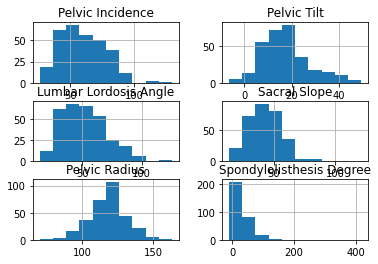

In [6]:
vis=data[['Pelvic Incidence','Pelvic Tilt','Lumbar Lordosis Angle','Sacral Slope','Pelvic Radius', 
                'Spondylolisthesis Degree']]
vis.hist()
plt.show()


In [7]:
data["Pelvic Incidence" ].mean()

60.496652929516145

In [8]:
data["Lumbar Lordosis Angle"].mean()

51.93092960345156

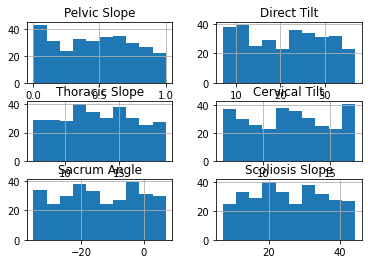

In [9]:
vis=data[[ 'Pelvic Slope', 'Direct Tilt', 'Thoracic Slope','Cervical Tilt','Sacrum Angle', 'Scoliosis Slope']]

vis.hist()
plt.show()

In [10]:
data["Pelvic Slope"].mean()

0.4729792534451614

In [11]:
data["Scoliosis Slope"].mean()

25.645980645161305

#  Plot scatter



In [15]:
#   Dropping Outlier
data = data.drop(115,0)
colr = copy.copy(data["Outcome"])
co = colr.map({1:0.44, 0:0.83})

#   Plot scatter
plt.scatter(data["Cervical Tilt"], data["Spondylolisthesis Degree"], c=co, cmap=plt.cm.RdYlGn)
plt.xlabel("Cervical Tilt")
plt.ylabel("Spondylolisthesis Degree")

colors=[ 'c', 'y', 'm',]
ab =data["Outcome"].where(data["Outcome"]==1)
no = data["Outcome"].where(data["Outcome"]==0)
plt.show()
# UNFINISHED ----- OBJECTIVE: Color visual by Outcome - 0 for green, 1 for Red (example)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


KeyError: ignored

# T-Test 

In [ ]:
import scipy.stats as stats
import math

def test_results(p):
  if p<= 0.05:
    print('The H0 is Rejected.')
  else:
    print('The H0 is failed to be rejected.')



# Exploratory Data Analysis

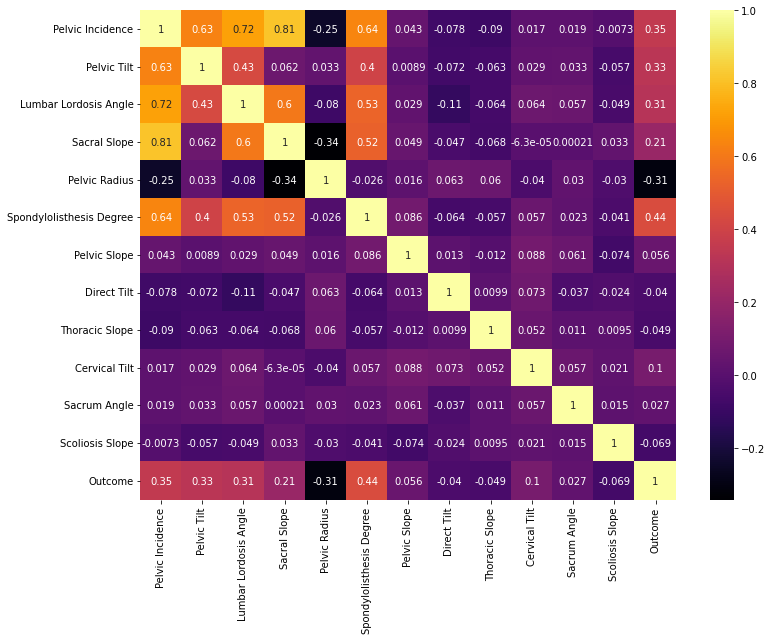

In [ ]:


# Set up the matplot figure
f, ax = plt.subplots(figsize=(12,9))

#Draw the heatmap using seaborn
sns.heatmap(corr, cmap='inferno', annot=True)

In [ ]:
from pylab import *
import copy
outlier = data[["Spondylolisthesis Degree", "Outcome"]]
#print(outlier[outlier >200])
abspond = outlier[outlier["Spondylolisthesis Degree"]>15]
print("1= Abnormal, 0=Normal\n",abspond["Outcome"].value_counts())

1= Abnormal, 0=Normal
 1    145
0      3
Name: Outcome, dtype: int64


In [ ]:
#   Create the training dataset
training = data.drop('Outcome', axis=1)
testing = data['Outcome']

In [ ]:
#   Import necessary ML packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#   Split into training/testing datasets using Train_test_split
X_train, X_test, y_train, y_test = train_test_split(training, testing, test_size=0.33, random_state=22, stratify=testing)

# Convert DataFrame Object to a numpy array due to faster computation in modelling

In [ ]:
import numpy as np

# convert to numpy.ndarray and dtype=float64 for optimal
array_train = np.asarray(training)
array_test = np.asarray(testing)
print(array_train.shape)
print(array_test.shape)

#   Convert each pandas DataFrame object into a numpy array object. 
array_XTrain, array_XTest, array_ytrain, array_ytest = np.asarray(X_train), np.asarray(X_test), np.asarray(y_train), np.asarray(y_test)


(309, 12)
(309,)


# Employing Support Vector Machine as a Classifier - 85%

In [ ]:
#    Import Necessary Packages
from sklearn import svm
from sklearn.metrics import accuracy_score

#   Instantiate the classifier
clf = svm.SVC(kernel='linear')

#   Fit the model to the training data
clf.fit(array_XTrain, array_ytrain)

#   Generate a prediction and store it in 'pred'
pred = clf.predict(array_XTest)

#   Print the accuracy score/percent correct
svmscore = accuracy_score(array_ytest, pred)
print("Support Vector Machines are ", svmscore*100, "accurate")

NameError: ignored